In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample = pd.read_csv('sample_submission.csv')

In [3]:
df_train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [4]:
df_test.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [5]:
df_sample.head()

,customer_id,churn_risk_score
0,fffe4300490044003600300030003800,2
1,fffe43004900440032003100300035003700,1
2,fffe4300490044003100390032003600,5
3,fffe43004900440036003000330031003600,5
4,fffe43004900440031003900350030003600,5


In [6]:
df_train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [8]:
#checking the statistical information in the training dataset
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,36992.0,37.118161,15.867412,10.000000,23.0000,37.000,51.000,64.000000
days_since_last_login,36992.0,-41.915576,228.819900,-999.000000,8.0000,12.000,16.000,26.000000
avg_time_spent,36992.0,243.472334,398.289149,-2814.109110,60.1025,161.765,356.515,3235.578521
avg_transaction_value,36992.0,29271.194003,19444.806226,800.460000,14177.5400,27554.485,40855.110,99914.050000
points_in_wallet,33549.0,686.882199,194.063624,-760.661236,616.1500,697.620,763.950,2069.069761
churn_risk_score,36992.0,3.463397,1.409661,-1.000000,3.0000,4.000,5.000,5.000000


In [9]:
#checking for missing values in the train and test dataset
print(f" The missing values in the train dataset: {df_train.isnull().sum()}")
print(f" The missing values in the test dataset: {df_test.isnull().sum()}")

 The missing values in the train dataset: customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64
 The missing values 

In [10]:
#checking the values for the missing values in the categorical columns for both data 
print("Unique values in region_category:", df_train['region_category'].unique())
print("\n")
print("Unique values in preferred_offer_types:", df_train['preferred_offer_types'].unique())
print("\n")
print("Unique values in region_category:", df_test['region_category'].unique())
print("\n")
print("Unique values in preferred_offer_types:", df_test['preferred_offer_types'].unique())

Unique values in region_category: ['Village' 'City' 'Town' nan]


Unique values in preferred_offer_types: ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]


Unique values in region_category: ['Village' 'Town' 'City' nan]


Unique values in preferred_offer_types: ['Without Offers' 'Gift Vouchers/Coupons' 'Credit/Debit Card Offers' nan]


In [11]:
#creating a function that fills the categorical columns with the most occuring values
def fill_categorical_with_mode(df):
    df_filled = df.copy()
    categorical_cols = df_filled.select_dtypes(include=['object', 'category']).columns
    
    for col in categorical_cols:
        mode_val = df_filled[col].mode(dropna=True)[0]
        df_filled[col].fillna(mode_val, inplace=True)
    
    return df_filled


In [12]:
#passing the function into the train data
df_train = fill_categorical_with_mode(df_train)

In [13]:
#passing the function into the test data
df_test = fill_categorical_with_mode(df_test)

In [14]:
#creating a function that fills the numerical columns with the meanvalues
def fill_missing_numericals(df):
    
    df_filled = df.copy()
    num_cols = df_filled.select_dtypes(include=['int64', 'float64']).columns

    for col in num_cols:
        if df_filled[col].isnull().sum() > 0:
            mean_val = df_filled[col].mean()
            df_filled[col].fillna(mean_val, inplace=True)
    
    return df_filled


In [15]:
#pasing the function into the both dataset
df_train = fill_missing_numericals(df_train)
df_test = fill_missing_numericals(df_test)

In [16]:
#rechecking for missing values 
print(f" The missing values in the train dataset: {df_train.isnull().sum()}")
print(f" The missing values in the test dataset: {df_test.isnull().sum()}")

 The missing values in the train dataset: customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64
 The missing values in the test dataset: customer_id                     0
Name                

In [17]:
#checking for duplicates
print(f" The duplicated values in the train dataset: {df_train.duplicated().sum()}")
print(f" The duplicated values in the test dataset: {df_test.duplicated().sum()}")

 The duplicated values in the train dataset: 0
 The duplicated values in the test dataset: 0


In [18]:
#checking for inconsistencies
for col in df_train.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}:")
    print(df_train[col].value_counts(dropna=False))
    print("-" * 40)

customer_id:
customer_id
fffe4300490044003600300030003800        1
fffe43004900440033003400330032003000    1
fffe43004900440032003300340031003500    1
fffe43004900440035003300380031003700    1
fffe43004900440031003800300034003500    1
                                       ..
fffe43004900440034003900380033003700    1
fffe43004900440031003400330031003900    1
fffe43004900440032003900340031003700    1
fffe43004900440033003100350038003400    1
fffe43004900440033003600340034003200    1
Name: count, Length: 36992, dtype: int64
----------------------------------------
Name:
Name
Pattie Morrisey     1
Brandon Casiano     1
Merideth Gebo       1
Neville Goodwill    1
Sol Siemers         1
                   ..
Gina Hintzen        1
Kizzy Ramos         1
Earlie Spalla       1
Vinnie Talley       1
Verlene Beaulieu    1
Name: count, Length: 36992, dtype: int64
----------------------------------------
gender:
gender
F          18490
M          18443
Unknown       59
Name: count, dtype: int64
----

In [19]:
#replacing the inconsistencies values for both data
df_train['medium_of_operation'] = df_train['medium_of_operation'].replace("?", "Unknown")
df_test['medium_of_operation'] = df_test['medium_of_operation'].replace("?", "Unknown")
df_train['joined_through_referral'] = df_train['joined_through_referral'].replace("?", "Prefer Not to Say")
df_test['joined_through_referral'] = df_test['joined_through_referral'].replace("?", "Prefer Not to Say")

In [20]:
#Converting to numeric, setting errors to NaN
df_train['avg_frequency_login_days'] = pd.to_numeric(df_train['avg_frequency_login_days'], errors='coerce')
df_test['avg_frequency_login_days'] = pd.to_numeric(df_test['avg_frequency_login_days'], errors='coerce')

#Fill NaNs (which include "error") with the mean of valid values
mean_value = df_train['avg_frequency_login_days'].mean()
df_train['avg_frequency_login_days'].fillna(mean_value, inplace=True)
mean_value = df_test['avg_frequency_login_days'].mean()
df_test['avg_frequency_login_days'].fillna(mean_value, inplace=True)

In [21]:
#cleaning the - signs in the avg time spend column and avg_frequency_login_days
df_train['avg_time_spent'] = df_train['avg_time_spent'].abs()
df_test['avg_time_spent'] = df_test['avg_time_spent'].abs()

df_train['avg_frequency_login_days'] = df_train['avg_frequency_login_days'].abs()
df_test['avg_frequency_login_days'] = df_test['avg_frequency_login_days'].abs()

In [22]:
#assigning the -1 in the churn_risk_rate to 1
df_train['churn_risk_score'] = df_train['churn_risk_score'].replace(-1, 1)

In [23]:
df_train['joined_through_referral'].unique()

array(['No', 'Prefer Not to Say', 'Yes'], dtype=object)

In [24]:
df_train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,Prefer Not to Say,CID21329,...,306.34,12838.38,10.0,686.882199,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5


In [25]:
df_test.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


### Exploratory Data Analysis (EDA)

In [26]:
df_train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

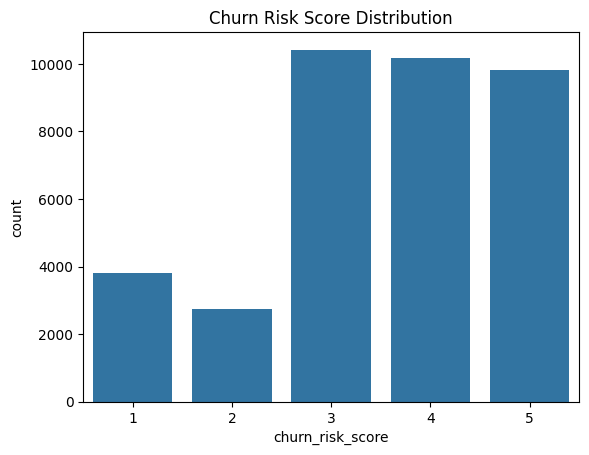

In [27]:
# Distribution of churn risk scores
sns.countplot(x='churn_risk_score', data=df_train)
plt.title('Churn Risk Score Distribution')
plt.show()

#####The above bar chart reveals a crucial insight into the company's customer base indicting that majority of customers are at moderate to high risk of churning, while very few are securely retained. this means there is a need for retention strategry. Below i would be digging further futher to know the reason why this customers are at risk of churning

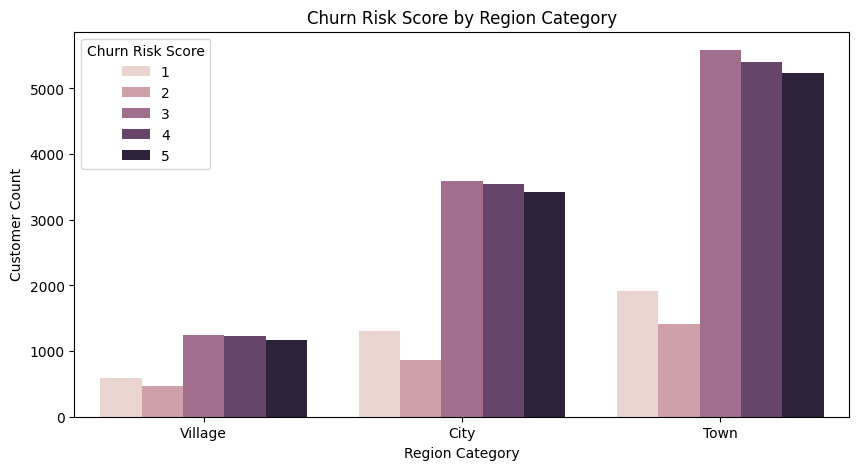

In [28]:
#Churn distribution by region
plt.figure(figsize=(10, 5))
sns.countplot(data=df_train, x='region_category', hue='churn_risk_score')
plt.title('Churn Risk Score by Region Category')
plt.xlabel('Region Category')
plt.ylabel('Customer Count')
plt.legend(title='Churn Risk Score')
plt.show()

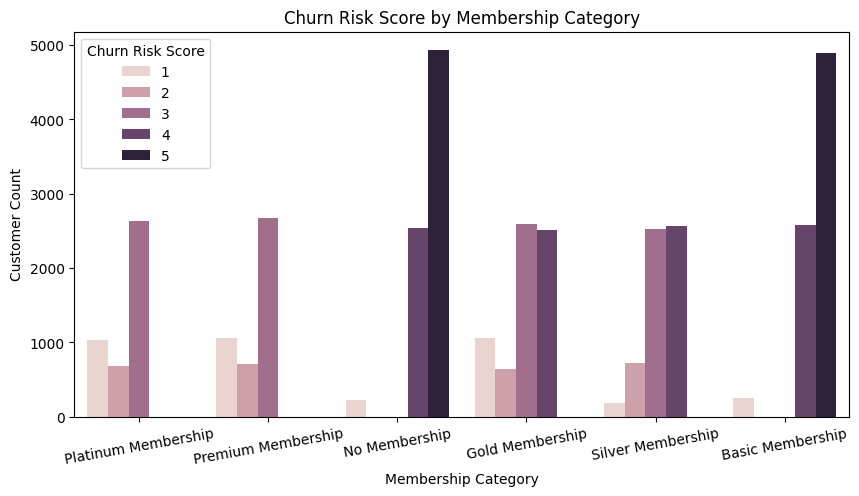

In [29]:
#churn risk by membership type
plt.figure(figsize=(10, 5))
sns.countplot(data=df_train, x='membership_category', hue='churn_risk_score')
plt.title('Churn Risk Score by Membership Category')
plt.xlabel('Membership Category')
plt.ylabel('Customer Count')
plt.legend(title='Churn Risk Score')
plt.xticks(rotation=10)
plt.show()

#####The insight gotten from the membership vs churn, shows that basic mambeership has the highest number of high risk_churners(score5). these customers may feel underserved or undervalued. Then the no membership also shows a largge volume of high-risk churners. likey less enaged and less loyal.The Sliver Membership has a modrate churn risk, but still signficant possible transitional customers. And for the Gold Members it has a mixed churn profile, some loyalty, but not immune to churn and while for the Premiun&Platinum has the lowest churn risk and smallest customer base. These members are likly retained due to better benefits or quality service quality.

In [30]:
#checking the correlation between the numerical columns and the fraud_label column
num_df = df_train.select_dtypes(include=['number'])
corr_matrix = num_df.corr()
corr_matrix

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
age,1.000000,-0.003970,-0.000720,-0.000473,-0.000381,0.000196,0.002467
days_since_last_login,-0.003970,1.000000,0.002814,0.003934,0.000956,0.008603,-0.009684
avg_time_spent,-0.000720,0.002814,1.000000,0.019383,0.000716,-0.004856,-0.023471
avg_transaction_value,-0.000473,0.003934,0.019383,1.000000,-0.131016,0.083729,-0.329712
avg_frequency_login_days,-0.000381,0.000956,0.000716,-0.131016,1.000000,-0.044984,0.191189
points_in_wallet,0.000196,0.008603,-0.004856,0.083729,-0.044984,1.000000,-0.285374
churn_risk_score,0.002467,-0.009684,-0.023471,-0.329712,0.191189,-0.285374,1.000000


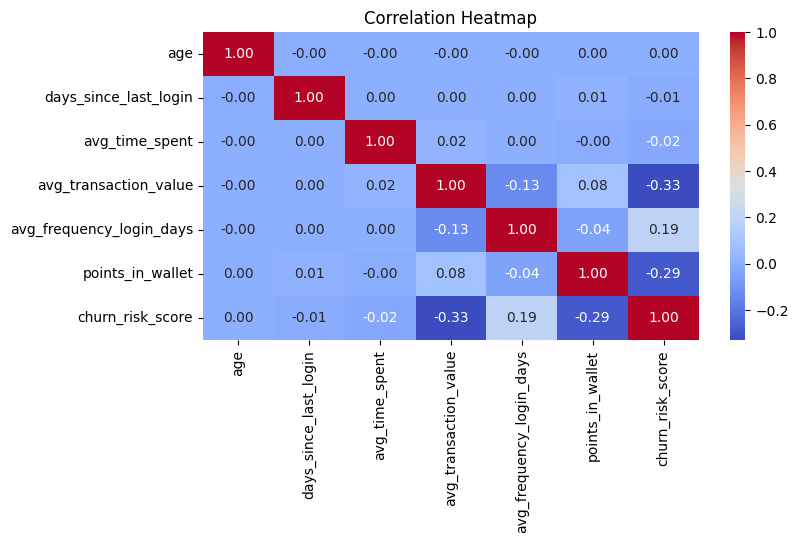

In [31]:
#visualising the correlation using heatmap

# Create heatmap
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#####Now this heatmap shows that transactional behavior and engagement are the biggest churn predictors while loyal incentives i.e point in wallet are working but not enouggh for Basic or No membership users.below i will be visualising churn risk vs transaction value the goal for this is to see how spending behaviour affects churn

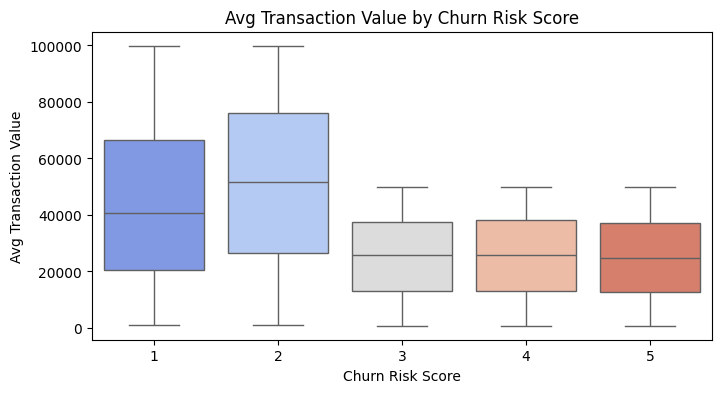

In [32]:
#Churn Risk Vs Transaction VAlue
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_train, x='churn_risk_score', y='avg_transaction_value', palette='coolwarm')
plt.title('Avg Transaction Value by Churn Risk Score')
plt.xlabel('Churn Risk Score')
plt.ylabel('Avg Transaction Value')
plt.show()


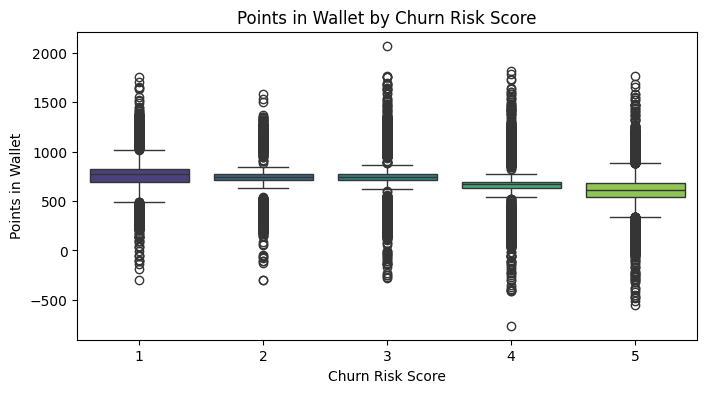

In [33]:
#Churn Risk vs Point in Wallet
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_train, x='churn_risk_score', y='points_in_wallet', palette='viridis')
plt.title('Points in Wallet by Churn Risk Score')
plt.xlabel('Churn Risk Score')
plt.ylabel('Points in Wallet')
plt.show()

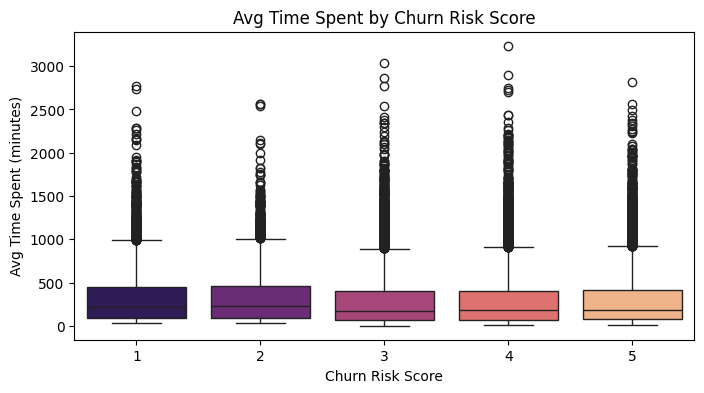

In [34]:
#Churn Risk vs Time Spent
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_train, x='churn_risk_score', y='avg_time_spent', palette='magma')
plt.title('Avg Time Spent by Churn Risk Score')
plt.xlabel('Churn Risk Score')
plt.ylabel('Avg Time Spent (minutes)')
plt.show()

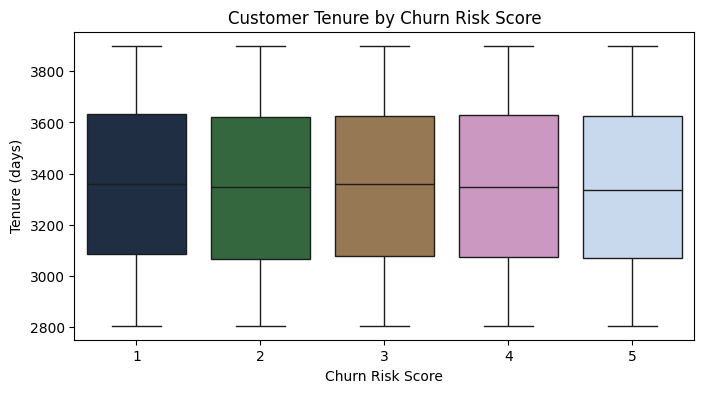

In [35]:
#Churn Risk By Tenure
df_train['tenure_days'] = (pd.to_datetime('today') - pd.to_datetime(df_train['joining_date'])).dt.days
df_test['tenure_days'] = (pd.to_datetime('today') - pd.to_datetime(df_test['joining_date'])).dt.days

plt.figure(figsize=(8, 4))
sns.boxplot(data=df_train, x='churn_risk_score', y='tenure_days', palette='cubehelix')
plt.title('Customer Tenure by Churn Risk Score')
plt.xlabel('Churn Risk Score')
plt.ylabel('Tenure (days)')
plt.show()


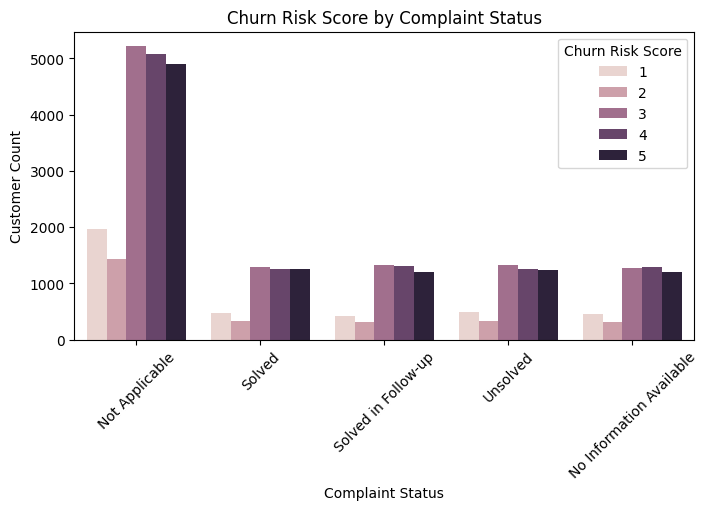

In [36]:
#Complain Status vs churn
plt.figure(figsize=(8, 4))
sns.countplot(data=df_train, x='complaint_status', hue='churn_risk_score')
plt.title('Churn Risk Score by Complaint Status')
plt.xlabel('Complaint Status')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.legend(title='Churn Risk Score')
plt.show()

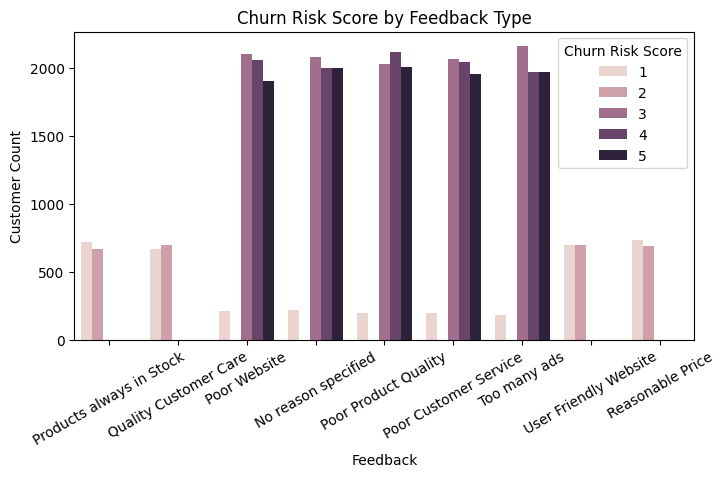

In [37]:
#feedback vs churn
plt.figure(figsize=(8, 4))
sns.countplot(data=df_train, x='feedback', hue='churn_risk_score')
plt.title('Churn Risk Score by Feedback Type')
plt.xlabel('Feedback')
plt.ylabel('Customer Count')
plt.xticks(rotation=30)
plt.legend(title='Churn Risk Score')
plt.show()

#####The EDA section shows Root causes of Churn
1) Low Perceived Value: Customers with low average transaction values and few points in their wallet are likely not seeing enough benefit from the service, so they are spending less, earning fewer reward and probable feeling underwhelmed.
2) Weak Engagement: The box plot on wallet point shows that high risk churners arent accumulating points and that a red flag for disengagement, they are either not participating in point earning activities or dont find the reward compelling, this suggests a need to rework how points are earned and redeemed, making it feel more rewarding.
3) Membership Category Inequality: the churn risk is highest among Basic members who feel undersevered or not receiving enough perks and the no-membership users who also feels leeast engaged and most transient.In contrast, Premium and Platinum members show the lowest churn risk,likely due to better benefits, personalized service, or exclusive access.
4) Negative Customer Experience:Feedback types like “Poor Website,” “Too many ads,” “Poor Product Quality,” and “Poor Customer Service” dominate churn scores 4 and 5. These customers are frustrated, disappointed, or overwhelmed.Even when complaints are marked “Solved,” churn remains high—suggesting resolution quality or speed may be lacking.
   
   WHAT CAN BE DONE
1) Re-engage low spenders with personalized offers and quick-win point challenges.
2) Revamp Basic membership to include more visible benefits.
3) Educate users on how to earn and use points—make the loyalty system feel tangible
4) Close the feedback loop reach out to dissatisfied users with tailored recovery campaigns.

### Data Preprocessing

In [38]:
df_train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'tenure_days'],
      dtype='object')

In [39]:
#converting the last_visit_time to datetime format
#ensuring its treated as a datetime n handles any invalid entry and convert them to NAN
df_train['last_visit_time'] = pd.to_datetime(df_train['last_visit_time'], errors='coerce')
df_test['last_visit_time'] = pd.to_datetime(df_test['last_visit_time'], errors='coerce')

#creating a new column
from datetime import datetime

today = pd.to_datetime('today')

df_train['days_since_last_visit'] = (today - df_train['last_visit_time']).dt.days
df_test['days_since_last_visit'] = (today - df_test['last_visit_time']).dt.days

#dropping the original column
df_train.drop(columns='last_visit_time', inplace=True)
df_test.drop(columns='last_visit_time', inplace=True)


In [40]:
#dropping columns that are not useful for the model and that might cause noise 
# Defining columns to drop
cols_to_drop = [
    'customer_id',
    'Name',
    'security_no',
    'referral_id',
    'joining_date',
    'complaint_status',
    'feedback'
]
# Dropping from train and test sets
df_train.drop(columns=cols_to_drop, inplace=True)
df_test.drop(columns=cols_to_drop, inplace=True)
# Confirming the drop
print("Remaining columns in train set:", df_train.columns.tolist())
print("Remaining columns in test set:", df_test.columns.tolist())

Remaining columns in train set: ['age', 'gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'churn_risk_score', 'tenure_days', 'days_since_last_visit']
Remaining columns in test set: ['age', 'gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'tenure_days', 'days_since_last_visit']


In [41]:
df_train.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'churn_risk_score',
       'tenure_days', 'days_since_last_visit'],
      dtype='object')

In [42]:
df_train.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,churn_risk_score,tenure_days,days_since_last_visit
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Unknown,Wi-Fi,17,300.63,53005.25,17.0,781.750000,Yes,Yes,No,2,2941,-1
1,32,F,City,Premium Membership,Prefer Not to Say,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10.0,686.882199,Yes,No,Yes,1,2930,-1
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22.0,500.690000,No,Yes,Yes,5,3220,-1
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6.0,567.660000,No,Yes,Yes,5,3233,-1
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16.0,663.060000,No,Yes,Yes,5,2915,-1


In [43]:
cat_cols = df_train.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_cols)


Categorical columns: ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint']


In [44]:
#assigning the categorical columns
cat_cols = ['gender', 
                     'region_category',
                     'membership_category', 
                     'joined_through_referral',
                     'preferred_offer_types', 
                     'medium_of_operation', 
                     'internet_option', 
                     'used_special_discount',
                     'offer_application_preference',
                     'past_complaint'
           ]

In [45]:
#Applying one-hot encoding using get_dummies
df_train_encoded = pd.get_dummies(df_train, columns=cat_cols, dtype='float', drop_first=True)

df_test_encoded = pd.get_dummies(df_test, columns=cat_cols, dtype='float', drop_first=True)

In [46]:
df_train_encoded.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'churn_risk_score', 'tenure_days', 'days_since_last_visit', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership',
       'joined_through_referral_Prefer Not to Say',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Desktop',
       'medium_of_operation_Smartphone', 'medium_of_operation_Unknown',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
       'past_complaint_Yes'],
      dtype=

In [47]:
X = df_train_encoded.drop('churn_risk_score', axis =1)
y = df_train_encoded['churn_risk_score']

In [79]:
#splitting training data into train/validation
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.20,random_state=101)

In [80]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [81]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_val_scaled = scaler.transform(X_val)

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)

In [83]:
rfc.fit(X_resampled_scaled,y_resampled)
rfc_pred = rfc.predict(X_val_scaled)

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val,rfc_pred))

              precision    recall  f1-score   support

           1       0.75      0.46      0.57       727
           2       0.78      0.43      0.56       573
           3       0.78      0.89      0.83      2152
           4       0.68      0.57      0.62      1980
           5       0.70      0.89      0.78      1967

    accuracy                           0.73      7399
   macro avg       0.74      0.65      0.67      7399
weighted avg       0.73      0.73      0.72      7399



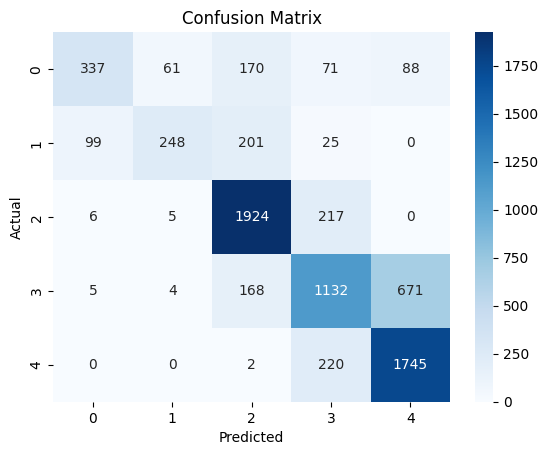

In [85]:

cm = confusion_matrix(y_val, rfc_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [89]:
y_resampled_shifted = y_resampled - 1

In [90]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    objective='multi:softmax',  # for multi-class classification
    num_class=5,                # if churn scores range from 0 to 5
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_resampled, y_resampled_shifted)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=5, ...)

In [91]:
y_pred_shifted = xgb_model.predict(X_val) + 1


In [92]:
print(classification_report(y_val,y_pred_shifted))

              precision    recall  f1-score   support

           1       0.73      0.45      0.55       727
           2       0.74      0.45      0.56       573
           3       0.78      0.89      0.83      2152
           4       0.66      0.60      0.63      1980
           5       0.70      0.84      0.77      1967

    accuracy                           0.72      7399
   macro avg       0.72      0.65      0.67      7399
weighted avg       0.72      0.72      0.71      7399



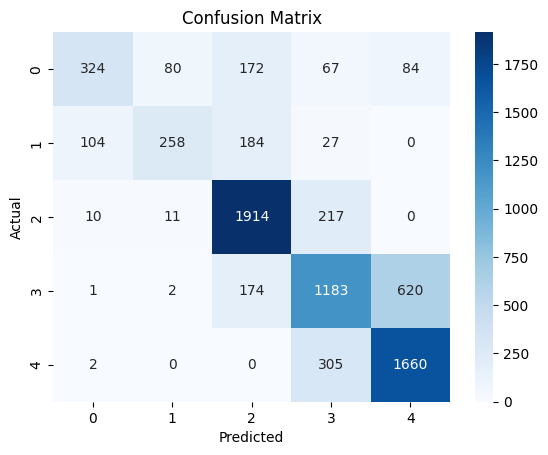

In [93]:
cm2 = confusion_matrix(y_val, y_pred_shifted)

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [95]:
X_test_scaled = scaler.transform(df_test_encoded)

y_pred_shifted = xgb_model.predict(X_test_scaled) +1

In [96]:
df_test['predicted_churn_score'] = y_pred_shifted


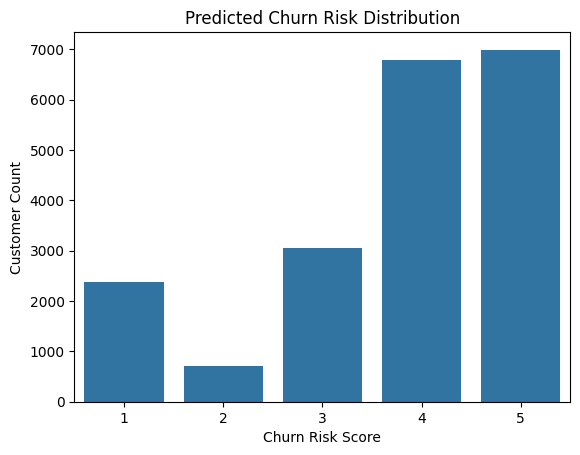

In [97]:
sns.countplot(data=df_test, x='predicted_churn_score')
plt.title('Predicted Churn Risk Distribution')
plt.xlabel('Churn Risk Score')
plt.ylabel('Customer Count')
plt.show()

In [105]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       5 non-null      object
 1   churn_risk_score  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [101]:
df_test_raw = pd.read_csv('test.csv', usecols=['customer_id'])

In [102]:
submission = pd.DataFrame({
    'customer_id': df_test_raw['customer_id'],
    'churn_risk_score': y_pred_shifted
})


In [110]:
submission

,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3
1,fffe43004900440031003900370037003300,4
2,fffe43004900440034003800360037003000,4
3,fffe43004900440036003200370033003400,4
4,fffe43004900440035003000370031003900,5
...,...,...
19914,fffe43004900440035003600330037003800,4
19915,fffe43004900440032003900370037003100,5
19916,fffe43004900440036003100310036003700,4
19917,fffe43004900440034003200330033003600,4
